In [1]:
import pandas as pd                                       #---> manejo de los datos
import matplotlib.pyplot as plt                           #---> para graficar los datos
from sklearn.preprocessing import MinMaxScaler            #---> modelos de aprendizaje de máquina
from sklearn.cluster import KMeans                        #---> MinMaxScaler para evitar el sesgo de los datos

clientes = pd.DataFrame({"saldo" : [50000, 45000, 48000, 43500, 47000, 52000,
                                    20000, 26000, 25000, 23000, 21400, 18000,
                                     8000, 12000,  6000, 14500, 12600,  7000],
                          "transacciones": [25, 20, 16, 23, 25, 18,
                                            23, 22, 24, 21, 27, 18, 
                                             8,  3,  6,  4,  9,  3]})

escalador = MinMaxScaler().fit(clientes.values)

clientes = pd.DataFrame(escalador.transform(clientes.values),
                        columns=["saldo", "transacciones"])

clientes

,saldo,transacciones
0,0.956522,0.916667
1,0.847826,0.708333
2,0.913043,0.541667
3,0.815217,0.833333
4,0.891304,0.916667
5,1.000000,0.625000
6,0.304348,0.833333
7,0.434783,0.791667
8,0.413043,0.875000
9,0.369565,0.750000


In [2]:
kmeans = KMeans(n_clusters=3).fit(clientes.values)
kmeans.labels_

C:\Users\gilgu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [3]:
clientes["cluster"] = kmeans.labels_
clientes

,saldo,transacciones,cluster
0,0.956522,0.916667,0
1,0.847826,0.708333,0
2,0.913043,0.541667,0
3,0.815217,0.833333,0
4,0.891304,0.916667,0
5,1.000000,0.625000,0
6,0.304348,0.833333,2
7,0.434783,0.791667,2
8,0.413043,0.875000,2
9,0.369565,0.750000,2


In [6]:
print(kmeans.cluster_centers_, kmeans.inertia_)

[[0.90398551 0.75694444]
 [0.08731884 0.10416667]
 [0.35289855 0.8125    ]] 0.3334968800322061


# Instrucciones para graficar los clusters

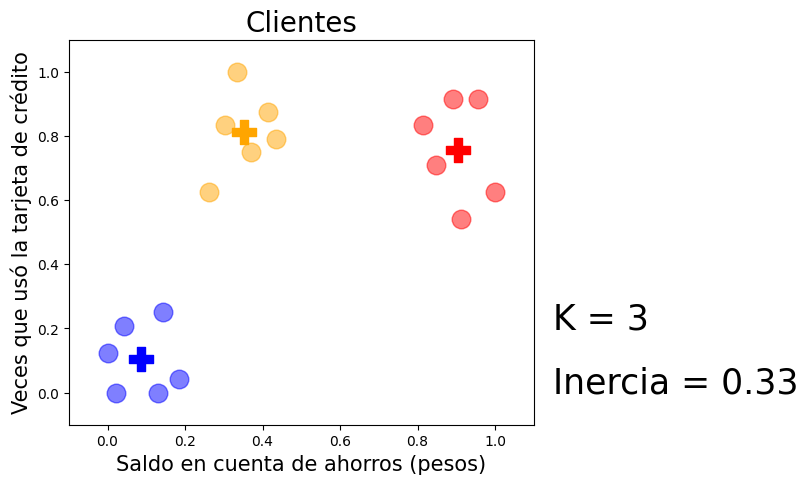

In [7]:
plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(clientes[clientes["cluster"] == cluster]["saldo"],
                clientes[clientes["cluster"] == cluster]["transacciones"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker="P", s=280, color=colores[cluster])
    
plt.title("Clientes", fontsize=20)
plt.xlabel("Saldo en cuenta de ahorros (pesos)", fontsize=15)
plt.ylabel("Veces que usó la tarjeta de crédito", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show

del clientes["cluster"]

In [8]:
kmeans = KMeans(n_clusters=2).fit(clientes.values)     #---> Número de cluster = 2
kmeans.labels_

C:\Users\gilgu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [9]:
clientes["cluster"] = kmeans.labels_
clientes

,saldo,transacciones,cluster
0,0.956522,0.916667,0
1,0.847826,0.708333,0
2,0.913043,0.541667,0
3,0.815217,0.833333,0
4,0.891304,0.916667,0
5,1.000000,0.625000,0
6,0.304348,0.833333,0
7,0.434783,0.791667,0
8,0.413043,0.875000,0
9,0.369565,0.750000,0


In [10]:
print(kmeans.cluster_centers_, kmeans.inertia_)

[[0.62844203 0.78472222]
 [0.08731884 0.10416667]] 1.253846640236645


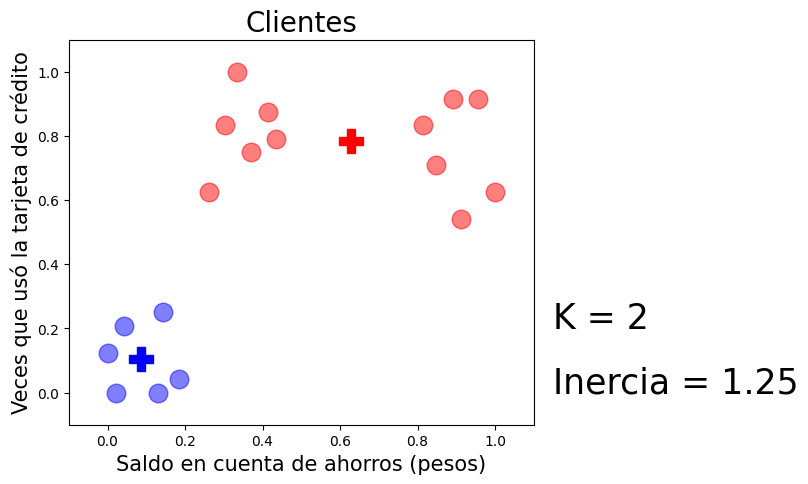

In [11]:
plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(clientes[clientes["cluster"] == cluster]["saldo"],
                clientes[clientes["cluster"] == cluster]["transacciones"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker="P", s=280, color=colores[cluster])
    
plt.title("Clientes", fontsize=20)
plt.xlabel("Saldo en cuenta de ahorros (pesos)", fontsize=15)
plt.ylabel("Veces que usó la tarjeta de crédito", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show

del clientes["cluster"]

In [12]:
kmeans = KMeans(n_clusters=4).fit(clientes.values)     #---> Número de cluster = 4
kmeans.labels_

C:\Users\gilgu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 3, 3, 0, 0, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [13]:
clientes["cluster"] = kmeans.labels_
clientes

,saldo,transacciones,cluster
0,0.956522,0.916667,0
1,0.847826,0.708333,3
2,0.913043,0.541667,3
3,0.815217,0.833333,0
4,0.891304,0.916667,0
5,1.000000,0.625000,3
6,0.304348,0.833333,2
7,0.434783,0.791667,2
8,0.413043,0.875000,2
9,0.369565,0.750000,2


In [14]:
print(kmeans.cluster_centers_, kmeans.inertia_)

[[0.88768116 0.88888889]
 [0.08731884 0.10416667]
 [0.35289855 0.8125    ]
 [0.92028986 0.625     ]] 0.2274458709654835


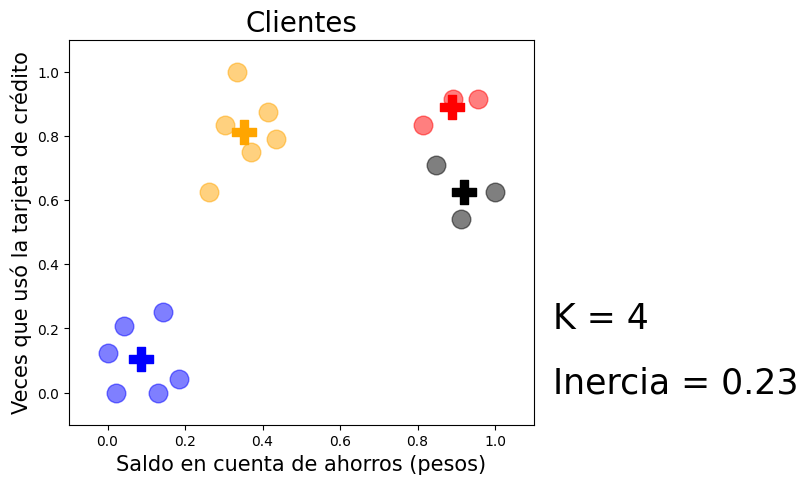

In [15]:
plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(clientes[clientes["cluster"] == cluster]["saldo"],
                clientes[clientes["cluster"] == cluster]["transacciones"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker="P", s=280, color=colores[cluster])
    
plt.title("Clientes", fontsize=20)
plt.xlabel("Saldo en cuenta de ahorros (pesos)", fontsize=15)
plt.ylabel("Veces que usó la tarjeta de crédito", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show

del clientes["cluster"]

In [ ]:
inercia = que tan pegados están los clientes de los centroides. Entre mas pegados es mejor.

In [16]:
kmeans = KMeans(n_clusters=7).fit(clientes.values)     #---> Número de cluster = 7
kmeans.labels_

C:\Users\gilgu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 4, 4, 0, 0, 4, 2, 2, 5, 2, 5, 6, 3, 1, 3, 1, 3, 1])

In [17]:
clientes["cluster"] = kmeans.labels_
clientes

,saldo,transacciones,cluster
0,0.956522,0.916667,0
1,0.847826,0.708333,4
2,0.913043,0.541667,4
3,0.815217,0.833333,0
4,0.891304,0.916667,0
5,1.000000,0.625000,4
6,0.304348,0.833333,2
7,0.434783,0.791667,2
8,0.413043,0.875000,5
9,0.369565,0.750000,2


In [18]:
print(kmeans.cluster_centers_, kmeans.inertia_)

[[0.88768116 0.88888889]
 [0.11231884 0.01388889]
 [0.36956522 0.79166667]
 [0.06231884 0.19444444]
 [0.92028986 0.625     ]
 [0.37391304 0.9375    ]
 [0.26086957 0.625     ]] 0.09690118935097672


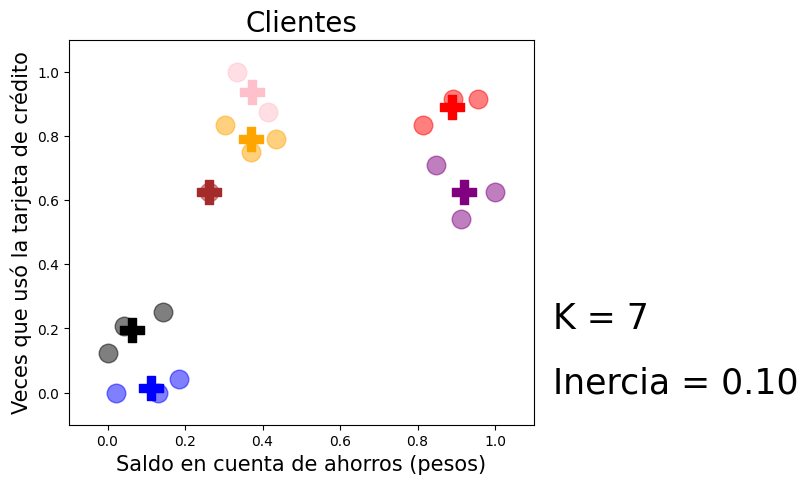

In [19]:
plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(clientes[clientes["cluster"] == cluster]["saldo"],
                clientes[clientes["cluster"] == cluster]["transacciones"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker="P", s=280, color=colores[cluster])
    
plt.title("Clientes", fontsize=20)
plt.xlabel("Saldo en cuenta de ahorros (pesos)", fontsize=15)
plt.ylabel("Veces que usó la tarjeta de crédito", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show

del clientes["cluster"]

# Método del Codo.

# Cálculo del número de Clusters (K).

C:\Users\gilgu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gilgu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gilgu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gilgu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

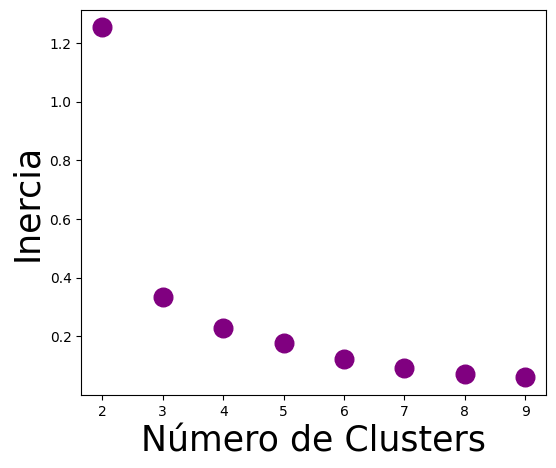

In [20]:
inercias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(clientes.values)
    inercias.append(kmeans.inertia_)
    
plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inercias, marker="o", s=180, color="purple")
plt.xlabel("Número de Clusters", fontsize=25)
plt.ylabel("Inercia", fontsize=25)
plt.show()